# Workshop \#3

## Numerical solution of the heat equation

### Task 1

Apply the von-Neumann stability analysis to determine for which values of $\mu$ the numerical scheme is stable.

### Task 2

In [52]:
# Numerical solution of the heat equation
# u_t = k * u_xx
# with Dirichlet boundary conditions
# u(0, t) = u(1, t) = 0
# and initial condition
# u(x, 0) = f(x)

import numpy as np

# Set the size of the domain
L = np.pi
tf = 3*np.pi**2 / 80
# Set dx
dx = np.pi / 20
# Set dt
dt = np.pi**2 / 1600

# Initial condition
def f(x):
    if 0 < x and x < np.pi/2:
        return x
    elif np.pi/2 <= x and x < np.pi:
        return np.pi - x
    
# Set the number of points in the x (space) direction
n = int(L / dx) + 1
# Set the number of points in the t (time) direction
m = int(1 / dt) + 1

# Set the grid
x = np.linspace(0, L, n)
t = np.linspace(0, tf, m)
u = np.zeros((n, m))

# Set the initial condition
for i in range(n):
    u[i, 0] = f(x[i])

# Set the boundary conditions
u[0, :] = 0
u[-1, :] = 0

# Set the diffusion constant
k = 1

# Set the coefficient matrix
r = k * dt / dx**2

# Time-stepping loop
for j in range(m - 1):
    for i in range(1, n - 1):
        u[i, j + 1] = r * u[i - 1, j] + (1 - 2 * r) * u[i, j] + r * u[i + 1, j]

# Create the meshgrid
T, X = np.meshgrid(t, x)

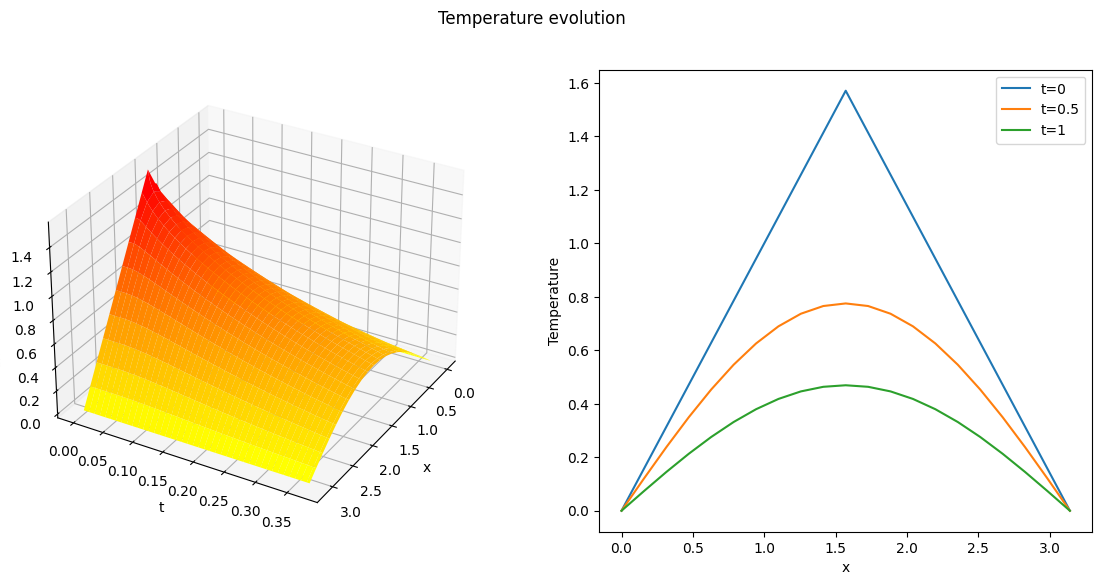

In [53]:
import matplotlib.pyplot as plt

# Create the 3D plot and 2D plots over time side by side
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Temperature evolution')

# 3D plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(30, 30)
ax.plot_surface(X, T, u, cmap='autumn_r')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('Temperature')

# 2D plots of t = 0, t = 0.5, t = 1
ax = fig.add_subplot(1, 2, 2)
ax.plot(x, u[:, 0], label='t=0')
ax.plot(x, u[:, int(m/2)], label='t=0.5')
ax.plot(x, u[:, -1], label='t=1')
ax.set_xlabel('x')
ax.set_ylabel('Temperature')
ax.legend()

plt.show()

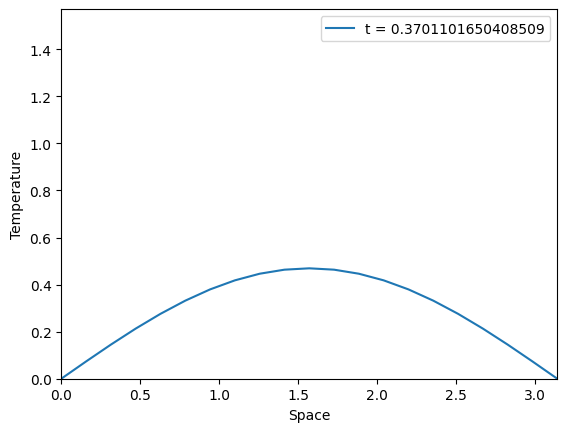

In [55]:
# 2D Animation over time
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(( 0, L))
ax.set_ylim((min(u[:, 0]), max(u[:, 0])))
line, = ax.plot(x, u[:, 0])
ax.set_xlabel('Space')
ax.set_ylabel('Temperature')

def init():
    line.set_ydata([np.nan] * len(x))
    line.set_label('t = 0')
    ax.legend()
    return line,

def animate(i):
    line.set_ydata(u[:, i])
    line.set_label('t = ' + str(t[i]))
    ax.legend()
    return line,

ani = animation.FuncAnimation(fig, animate, frames=m, init_func=init, blit=True, interval=1000*dt*1000, repeat=False)
ani.save('heat_equation.gif', fps=30)

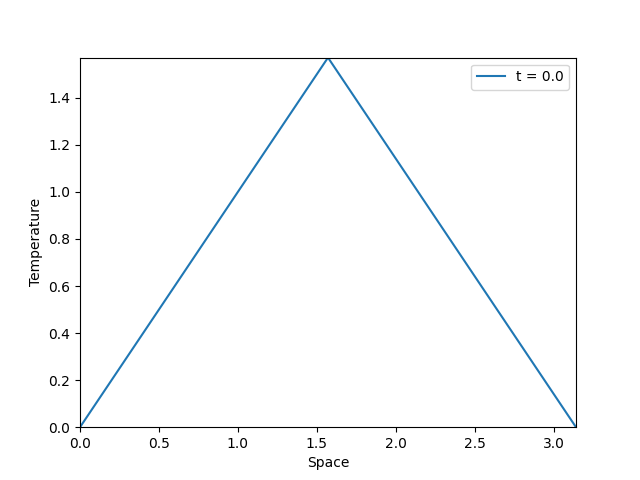

## The heat kernel

In this section we give a probabilistic interpretation of the heat kernel.

### Task 3

What is the probabilty that at $t = 1$ the particle lies in the interval $(a,b)$?